In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import began
from astropy.io import fits
from began.visualization import mplot
import astropy.units as u
%matplotlib inline

In [2]:
fpath = "../data/raw/mhd/R8_2pc_2020-02-13/R8_2pc_rst.0350.N512.f353.MBB.x350y0z100.IQU.fits"
#fpath = "../data/raw/mhd/R8_2pc_2020-02-13/R8_2pc_rst.0350.N256.f150.MBB.x350y0z100.IQU.fits"
cmdr_fpath = "../data/raw/planck/commander/COM_CompMap_QU-thermaldust-commander_2048_R3.00_full.fits"
hdu = fits.open(fpath)
mhd = hp.ud_grade(hp.read_map(fpath, field=(0, 1, 2), verbose=False), nside_out=512)
mhd = hp.smoothing(mhd, fwhm=0.2 * np.pi/180., verbose=False)

/home/bthorne/projects/gan/began/envs-gpu/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


In [3]:
cmdr = hp.ud_grade(hp.read_map(cmdr_fpath, field=(0, 1, 2), verbose=False), nside_out=512)
smo_cmdr = hp.smoothing(cmdr, fwhm=2 * np.pi/180., verbose=False)
print(repr(hdu[1].header))

/home/bthorne/projects/gan/began/envs-gpu/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                12288 / length of dimension 1                          
NAXIS2  =                 3072 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'TEMPERATURE'                                                         
TFORM1  = '1024E   '                                                            
TTYPE2  = 'Q_POLARISATION'                                                      
TFORM2  = '1024E   '                                                            
TTYPE3  = 'U_POLARISATION'  

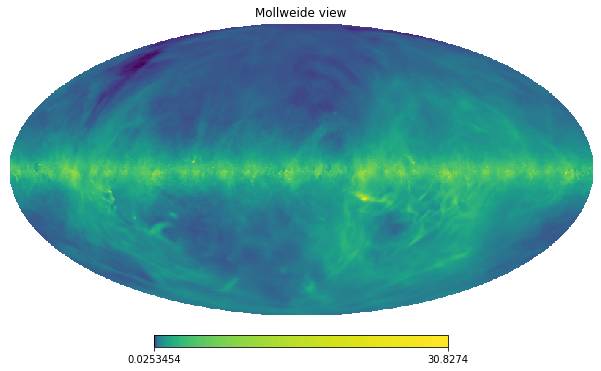

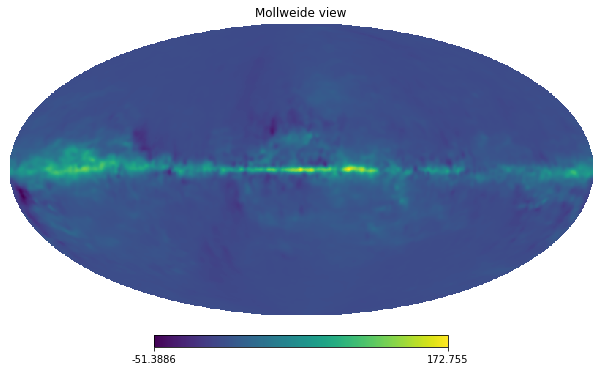

In [4]:
hp.mollview(mhd[0], norm='log')
hp.mollview(smo_cmdr[0])

In [5]:
gal_cut = 20. * u.deg
step_size = 30 * u.deg
ang_x = 40. * u.deg
ang_y = 40. * u.deg
extent=(-ang_x.value/2, ang_x.value/2, -ang_y.value/2, ang_y.value/2)
xres = 256
yres = 256
centers = began.tools.get_patch_centers(gal_cut, step_size)
print(len(centers))

19


In [6]:
fc = began.tools.FlatCutter(ang_x, ang_y, xres, yres)
cut_maps = np.array([fc.rotate_to_pole_and_interpolate(lon, lat, mhd) for (lon, lat) in centers])
cmdr_cut_maps = np.array([fc.rotate_to_pole_and_interpolate(lon, lat, smo_cmdr) for (lon, lat) in centers])

In [7]:
cut_maps.shape

(19, 256, 256, 3)

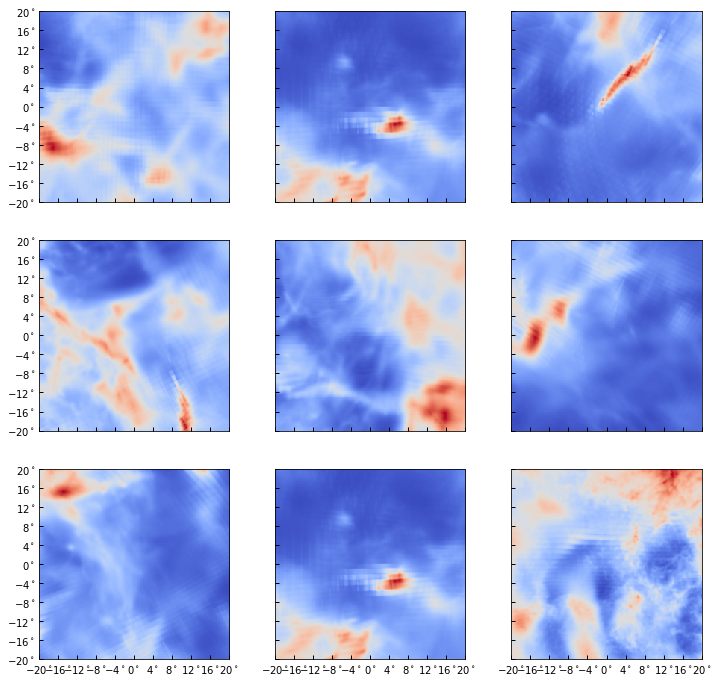

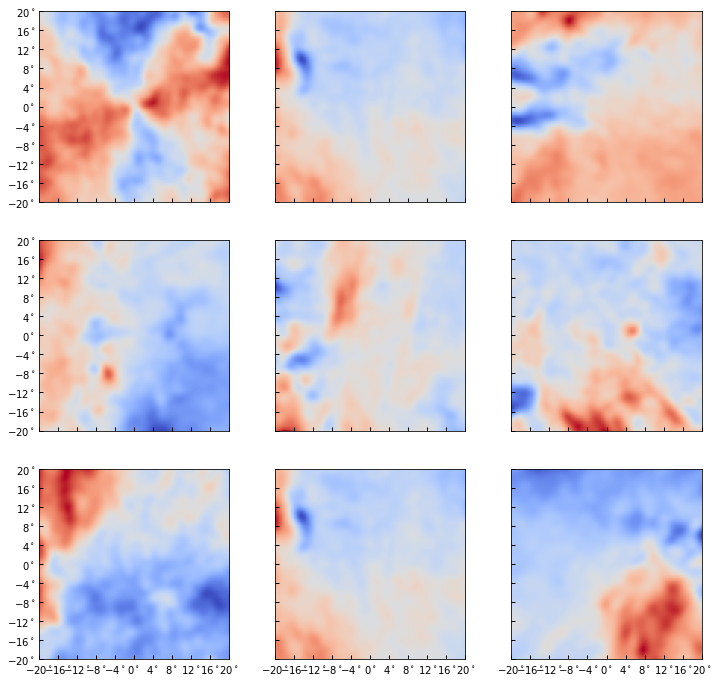

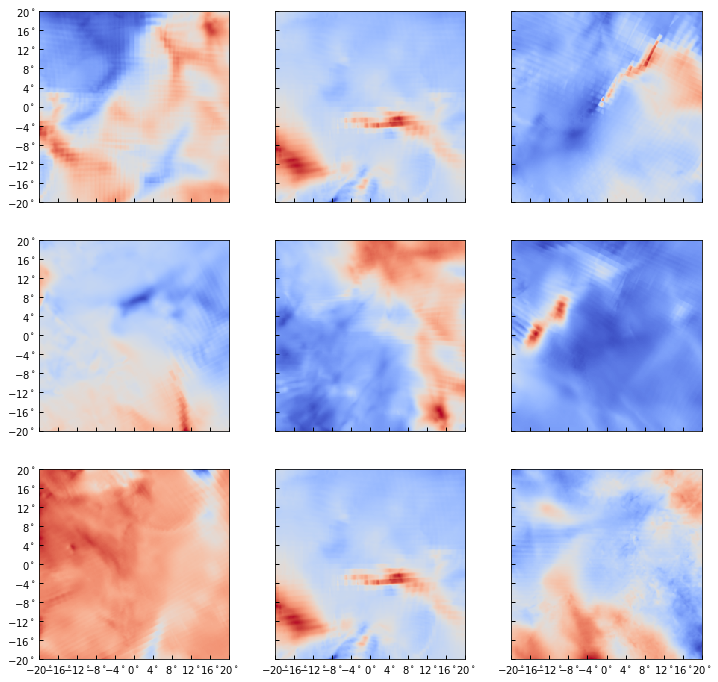

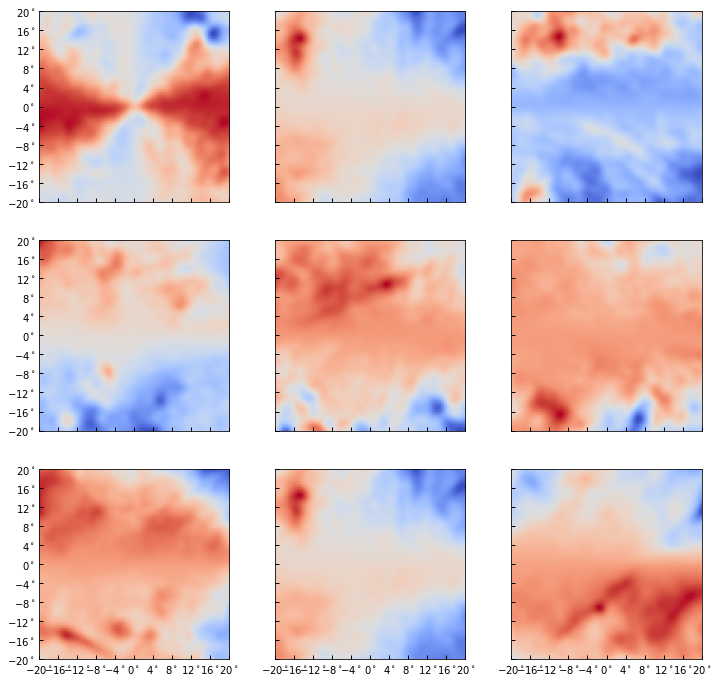

In [8]:
mplot(cut_maps[:9, :, :, 0], extent=extent);
mplot(cmdr_cut_maps[:9, :, :, 0], extent=extent);



mplot(cut_maps[:9, :, :, 2], extent=extent);
mplot(cmdr_cut_maps[:9, :, :, 2], extent=extent);

In [9]:
cls = hp.anafast(smo_cmdr)

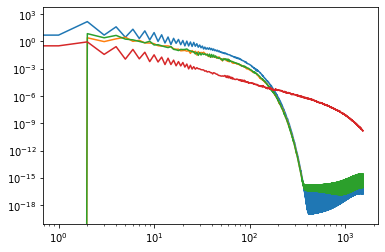

In [10]:
cls_mhd = hp.anafast(mhd)

fig, ax = plt.subplots(1, 1)
ax.loglog(cls[0])
ax.loglog(cls[1])
ax.loglog(cls[2])
ax.loglog(cls_mhd[0])

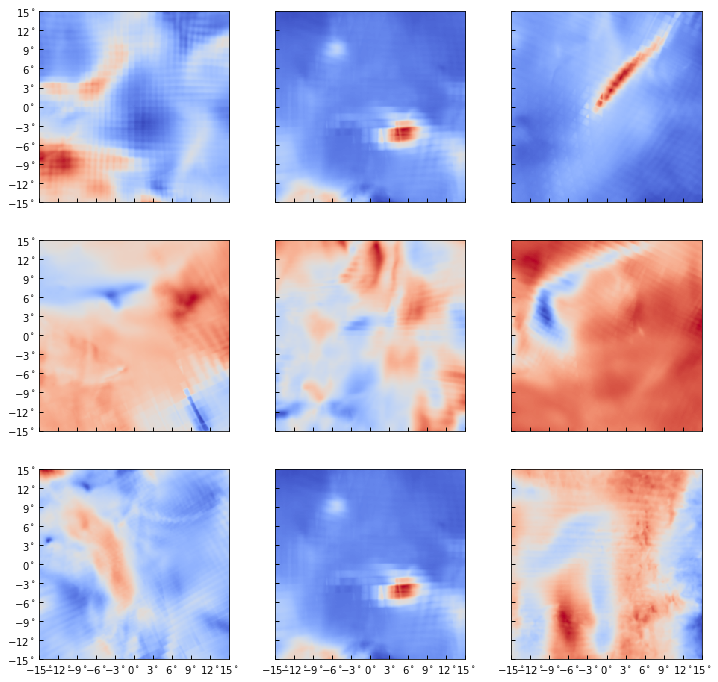

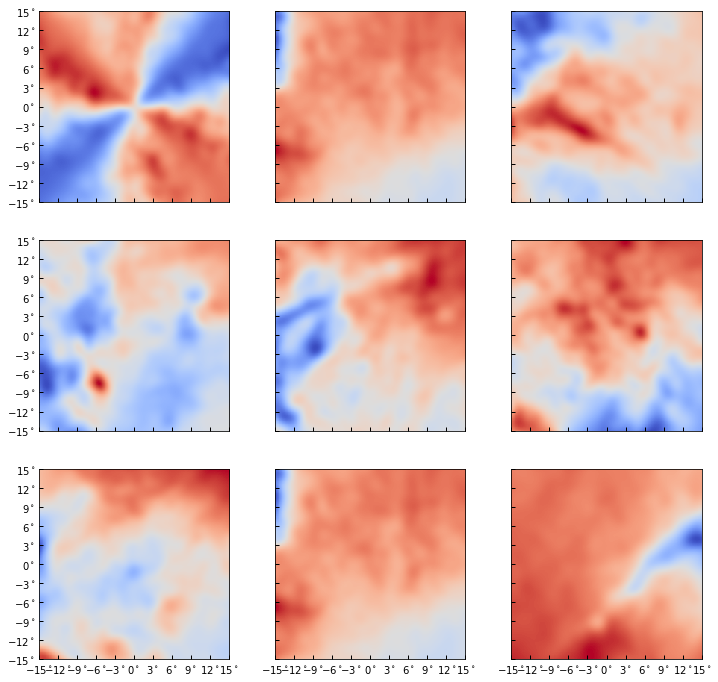

In [51]:
mplot(cut_maps[:9, :, :, 1], extent=extent);
mplot(cmdr_cut_maps[:9, :, :, 1], extent=extent);